In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb 


import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(x_train, y_train), (x_test, y_test ) = imdb.load_data(num_words=5000)

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [5]:
model = Sequential()

model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding="valid", activation="relu", strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 35s 129ms/step - loss: 0.4485 - accuracy: 0.7737 - val_loss: 0.3676 - val_accuracy: 0.8377
Epoch 2/5
250/250 [==============================] - 32s 129ms/step - loss: 0.2960 - accuracy: 0.8756 - val_loss: 0.3334 - val_accuracy: 0.8557
Epoch 3/5
250/250 [==============================] - 33s 132ms/step - loss: 0.2536 - accuracy: 0.8947 - val_loss: 0.3253 - val_accuracy: 0.8599
Epoch 4/5
250/250 [==============================] - 33s 132ms/step - loss: 0.2161 - accuracy: 0.9152 - val_loss: 0.3289 - val_accuracy: 0.8549
Epoch 5/5
250/250 [==============================] - 32s 130ms/step - loss: 0.1801 - accuracy: 0.9327 - val_loss: 0.3503 - val_accuracy: 0.8542


In [8]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 6s 7ms/step - loss: 0.3503 - accuracy: 0.8542

 Test Accuracy: 0.8542


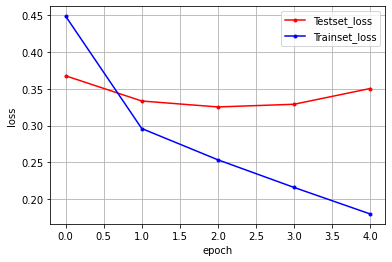

In [9]:
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

plt.legend(loc="upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()